In [1]:
from helpers import *
from plot_helpers import *
from sklearn.model_selection import train_test_split
from timer import Timer
from sklearn.decomposition import IncrementalPCA

In [2]:
index_ = "L50"

In [3]:
size = 50*50
samples = 1000

dtypes = dict([(i, np.int8) for i in range(1,size+1)])
dtypes[0]=np.float32

rawL50 = pd.read_csv("../data/DataBool_C_L50_MCS200000_WT20000.txt", sep=" ", header=None, dtype=dtypes)
# prepare data
X, Y, val_set = base_prepare(rawL50,
                             exportLabels = True,
                             normalize_data = False,
                             select_val_set=True,
                             nsamples=samples,
                             index_=index_,
                             save=False)

In [4]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle=True)
print("X_train_size: ", X_train.shape)
print("X_test_size: ", X_test.shape)
print("Y_train_size: ", Y_train.shape)
print("Y_test_size: ", Y_test.shape)

X_train_size:  (281740, 2500)
X_test_size:  (70436, 2500)
Y_train_size:  (281740, 2)
Y_test_size:  (70436, 2)


In [5]:
num_classes = 2
epochs = 100
batch_size = 400

input_shape = (X_train.shape[1],)

In [6]:
# Define Callbacks
# Initializing callbacks
path = f"./model_{index_}.h5"

# Saves the model in-between epochs when there is an improvement in "val_loss"
checkpoint = ModelCheckpoint(path,
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in "val_loss" is observed after set "patience"
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 6,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors "val_loss" for a set 'patience', then the learning rate is reduced by a factor specified manually.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              patience = 4, verbose=1,
                              factor=0.3)


callbacks = [checkpoint, earlystop, reduce_lr]
# callbacks = [checkpoint, reduce_lr]


METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
]

In [7]:
model = build_func_model(input_shape, hidden_units=100, l2_reg=0.1, bias_factor=0.001)

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 11s 14ms/step - loss: 5.4596 - categorical_accuracy: 0.8332 - val_loss: 0.0958 - val_categorical_accuracy: 0.9871

Epoch 00001: val_loss improved from inf to 0.09581, saving model to .\model_L50.h5
Epoch 2/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0919 - categorical_accuracy: 0.9855 - val_loss: 0.0747 - val_categorical_accuracy: 0.9844

Epoch 00002: val_loss improved from 0.09581 to 0.07467, saving model to .\model_L50.h5
Epoch 3/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0691 - categorical_accuracy: 0.9871 - val_loss: 0.1107 - val_categorical_accuracy: 0.9790

Epoch 00003: val_loss did not improve from 0.07467
Epoch 4/100
705/705 [==============================] - 8s 12ms/step - loss: 0.1950 - categorical_accuracy: 0.9701 - val_loss: 0.0675 - val_categorical_accuracy: 0.9903

Epoch 00004: val_loss improved from 0.07467 to 0.06747, saving model to .\model_L50.h5
Epoch 5/100
705

705/705 [==============================] - 9s 12ms/step - loss: 0.0414 - categorical_accuracy: 0.9902 - val_loss: 0.0411 - val_categorical_accuracy: 0.9892

Epoch 00035: val_loss improved from 0.04142 to 0.04113, saving model to .\model_L50.h5
Epoch 36/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0409 - categorical_accuracy: 0.9903 - val_loss: 0.0497 - val_categorical_accuracy: 0.9869

Epoch 00036: val_loss did not improve from 0.04113
Epoch 37/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0416 - categorical_accuracy: 0.9900 - val_loss: 0.0398 - val_categorical_accuracy: 0.9895

Epoch 00037: val_loss improved from 0.04113 to 0.03981, saving model to .\model_L50.h5
Epoch 38/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0402 - categorical_accuracy: 0.9902 - val_loss: 0.0464 - val_categorical_accuracy: 0.9878

Epoch 00038: val_loss did not improve from 0.03981
Epoch 39/100
705/705 [==============================] - 9

705/705 [==============================] - 9s 12ms/step - loss: 0.0357 - categorical_accuracy: 0.9906 - val_loss: 0.0384 - val_categorical_accuracy: 0.9890

Epoch 00069: val_loss did not improve from 0.03541
Epoch 70/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0356 - categorical_accuracy: 0.9909 - val_loss: 0.0352 - val_categorical_accuracy: 0.9903

Epoch 00070: val_loss improved from 0.03541 to 0.03520, saving model to .\model_L50.h5
Epoch 71/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0352 - categorical_accuracy: 0.9909 - val_loss: 0.0358 - val_categorical_accuracy: 0.9908

Epoch 00071: val_loss did not improve from 0.03520
Epoch 72/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0355 - categorical_accuracy: 0.9908 - val_loss: 0.0352 - val_categorical_accuracy: 0.9903

Epoch 00072: val_loss improved from 0.03520 to 0.03517, saving model to .\model_L50.h5
Epoch 73/100
705/705 [==============================] - 9

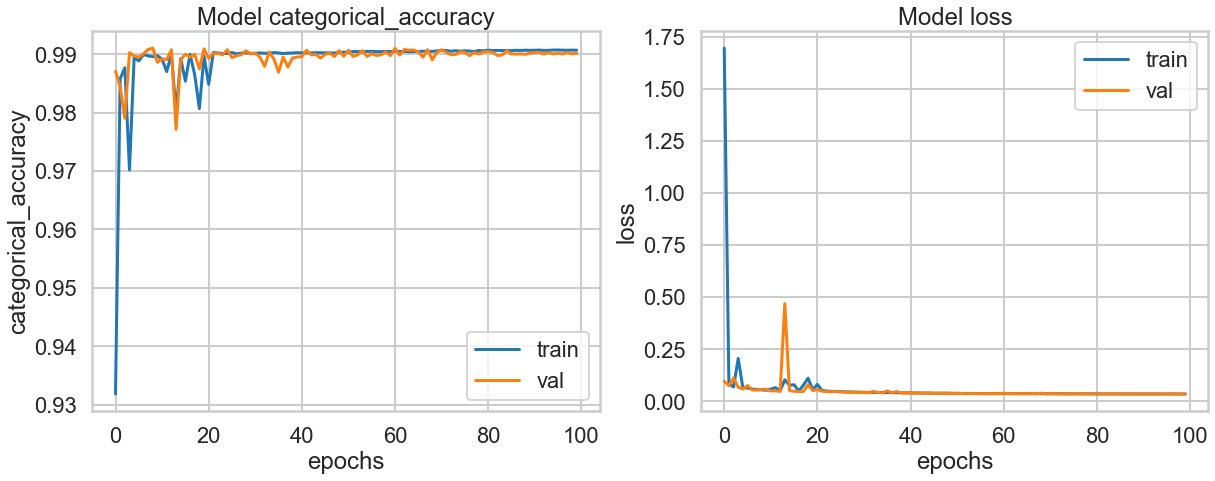

In [8]:
def plot_history(history, metric_names=["categorical_accuracy", "loss"], filename = "", figsize=(20, 7)):
    """
    plot and saves history from model history
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.ravel()
    historyDataFrame = pd.DataFrame()
    metrics = metric_names
    for i, met in enumerate(metrics):
        historyDataFrame[met] = history.history[met]
        historyDataFrame["val_" + met] = history.history["val_" + met]
        ax[i].plot(history.history[met])
        ax[i].plot(history.history["val_" + met])
        ax[i].set_title("Model {}".format(met))
        ax[i].set_xlabel("epochs")
        ax[i].set_ylabel(met)
        ax[i].legend(["train", "val"])
    if filename:
        historyDataFrame.to_csv(filename)

        
plot_history(history)

In [9]:
val_loss, val_acc = model.evaluate(x=X_test, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 8ms/step - loss: 0.0345 - categorical_accuracy: 0.9902
Validation loss: 0.0345
Validation accuracy: 0.990


In [10]:
df_pred50 = generate_predictions(val_set, model, f"predictions_{index_}.csv", only_mean=False)

440/440 [==============================] - 2s 5ms/step


# PCA --> reduction to 2 components

In [11]:
pca = IncrementalPCA(2)
pca.fit(X_train)

IncrementalPCA(n_components=2)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
pca.explained_variance_ratio_

array([0.32290227, 0.00452974])

In [14]:
X_train_pca = X_train_pca.astype(np.float32)
X_test_pca = X_test_pca.astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 8s 10ms/step - loss: 4.0440 - categorical_accuracy: 0.9870 - val_loss: 0.0608 - val_categorical_accuracy: 0.9886

Epoch 00001: val_loss did not improve from 0.03450
Epoch 2/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0593 - categorical_accuracy: 0.9888 - val_loss: 0.0525 - val_categorical_accuracy: 0.9881

Epoch 00002: val_loss did not improve from 0.03450
Epoch 3/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0516 - categorical_accuracy: 0.9892 - val_loss: 0.0456 - val_categorical_accuracy: 0.9905

Epoch 00003: val_loss did not improve from 0.03450
Epoch 4/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0465 - categorical_accuracy: 0.9899 - val_loss: 0.0436 - val_categorical_accuracy: 0.9892

Epoch 00004: val_loss did not improve from 0.03450
Epoch 5/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0445 - categorical_accuracy: 0.9899 - val_


Epoch 00035: val_loss did not improve from 0.02994

Epoch 00035: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 36/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0303 - categorical_accuracy: 0.9909 - val_loss: 0.0298 - val_categorical_accuracy: 0.9909

Epoch 00036: val_loss improved from 0.02994 to 0.02975, saving model to .\model_L50.h5
Epoch 37/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0313 - categorical_accuracy: 0.9907 - val_loss: 0.0300 - val_categorical_accuracy: 0.9906

Epoch 00037: val_loss did not improve from 0.02975
Epoch 38/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0310 - categorical_accuracy: 0.9909 - val_loss: 0.0298 - val_categorical_accuracy: 0.9910

Epoch 00038: val_loss did not improve from 0.02975
Epoch 39/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0306 - categorical_accuracy: 0.9907 - val_loss: 0.0297 - val_categorical_accuracy: 0.9909

E

In [15]:
val_loss, val_acc = model.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0296 - categorical_accuracy: 0.9907
Validation loss: 0.0296
Validation accuracy: 0.991


In [16]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred50_pca = generate_predictions(val_set, val_set_pca, model, f"predictions_{index_}_PCA.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


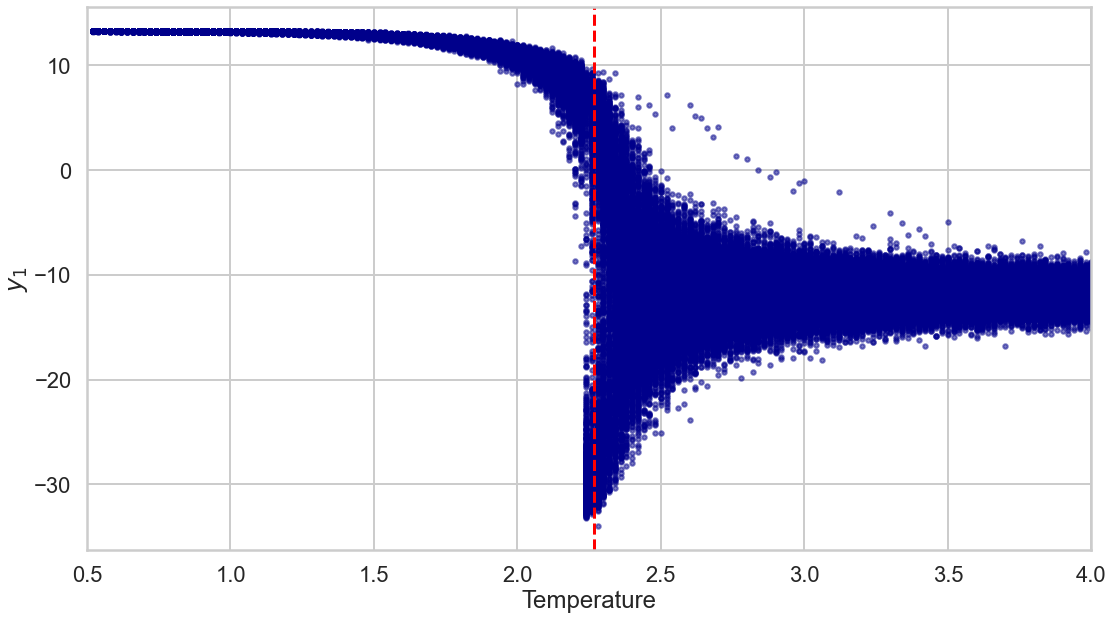

In [17]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,0], s=20, color="darkblue", alpha=0.5)
ax.set_ylabel(r"$y_1$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="red")
plt.savefig(f"pca_{index_}_1st_comp_on_temperature.svg", bbox_inches="tight")

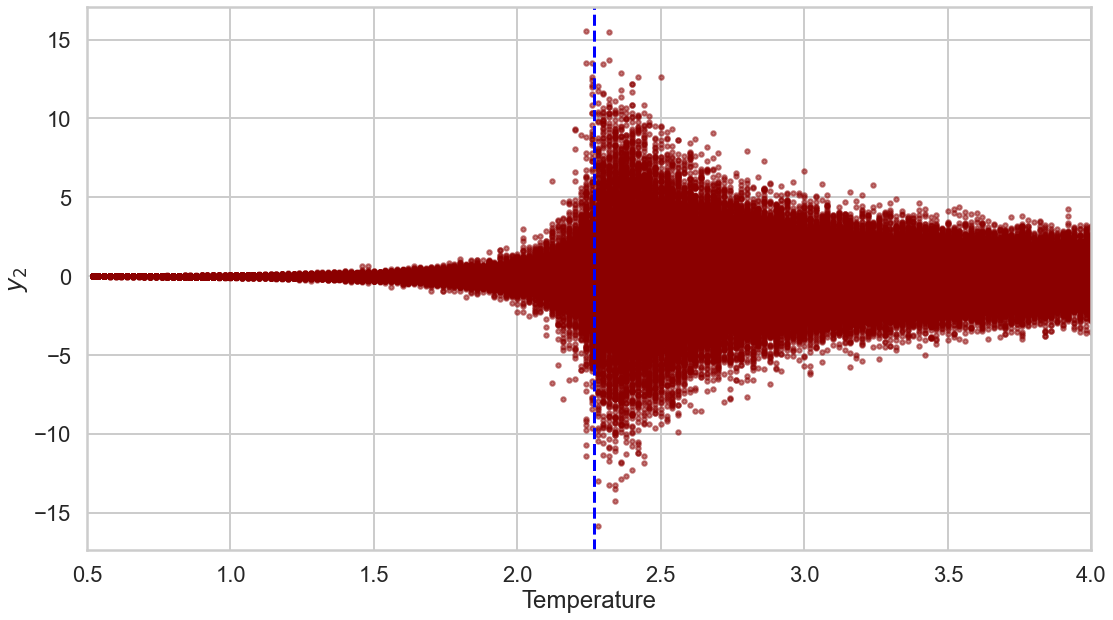

In [18]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,1], s=20, color="darkred", alpha=0.5)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="blue")
plt.savefig(f"pca_{index_}_2nd_comp_on_temperature.svg", bbox_inches="tight")

In [19]:
df = pd.DataFrame()
df["Temperature"] = val_set.iloc[:,0]
df["1st component"] = val_set_pca[:,0]
df["2nd component"] = val_set_pca[:,1]
df.to_csv(f"projections_{index_}.csv")

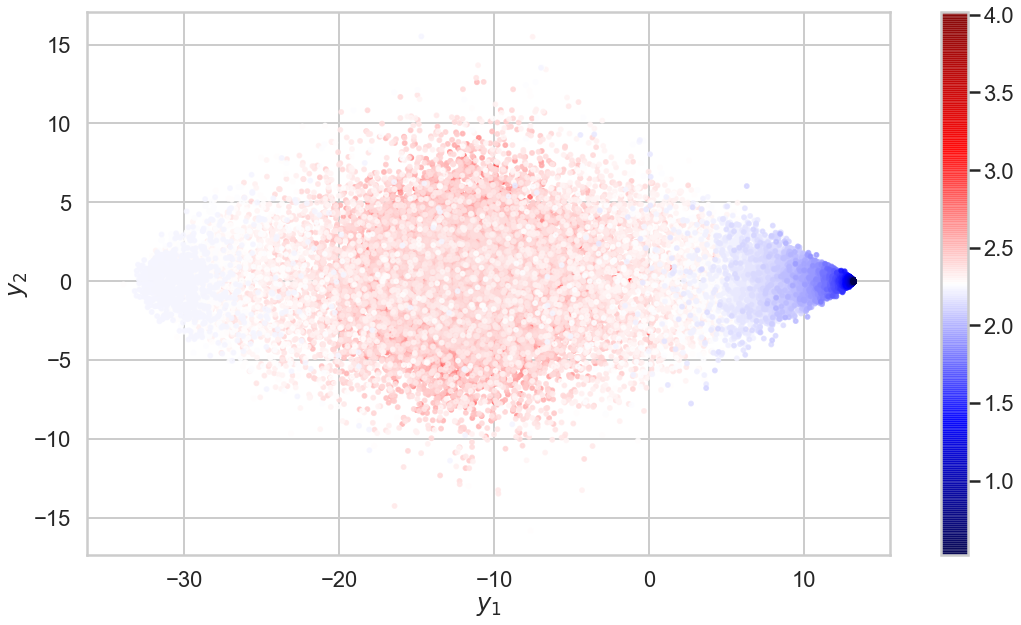

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
p = ax.scatter(df["1st component"], df["2nd component"], c=df["Temperature"], cmap="seismic", s=15, alpha=0.8)
plt.colorbar(p)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel(r"$y_1$")
plt.savefig(f"pca_{index_}_projections.png", bbox_inches="tight")

# PCA --> components 286


In [7]:
components = 286

pca100 = IncrementalPCA(components)
pca100.fit(X_train)

X_train_pca100 = pca100.transform(X_train).astype(np.float32)
X_test_pca100 = pca100.transform(X_test).astype(np.float32)

input_shape = (X_test_pca100.shape[1],)

model2 = build_func_model(input_shape, hidden_units=100, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca100, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca100, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 9s 10ms/step - loss: 5.4300 - categorical_accuracy: 0.9621 - val_loss: 0.0765 - val_categorical_accuracy: 0.9894

Epoch 00001: val_loss improved from inf to 0.07651, saving model to .\model_L50.h5
Epoch 2/100
705/705 [==============================] - 5s 8ms/step - loss: 0.0741 - categorical_accuracy: 0.9882 - val_loss: 0.0622 - val_categorical_accuracy: 0.9892

Epoch 00002: val_loss improved from 0.07651 to 0.06218, saving model to .\model_L50.h5
Epoch 3/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0621 - categorical_accuracy: 0.9885 - val_loss: 0.0563 - val_categorical_accuracy: 0.9909

Epoch 00003: val_loss improved from 0.06218 to 0.05630, saving model to .\model_L50.h5
Epoch 4/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0561 - categorical_accuracy: 0.9892 - val_loss: 0.0527 - val_categorical_accuracy: 0.9893

Epoch 00004: val_loss improved from 0.05630 to 0.05267, saving model t

705/705 [==============================] - 5s 8ms/step - loss: 0.0317 - categorical_accuracy: 0.9911 - val_loss: 0.0316 - val_categorical_accuracy: 0.9912

Epoch 00034: val_loss improved from 0.03165 to 0.03165, saving model to .\model_L50.h5
Epoch 35/100
705/705 [==============================] - 5s 8ms/step - loss: 0.0318 - categorical_accuracy: 0.9908 - val_loss: 0.0320 - val_categorical_accuracy: 0.9906

Epoch 00035: val_loss did not improve from 0.03165
Epoch 36/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0314 - categorical_accuracy: 0.9909 - val_loss: 0.0316 - val_categorical_accuracy: 0.9909

Epoch 00036: val_loss improved from 0.03165 to 0.03159, saving model to .\model_L50.h5
Epoch 37/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0319 - categorical_accuracy: 0.9907 - val_loss: 0.0315 - val_categorical_accuracy: 0.9911

Epoch 00037: val_loss improved from 0.03159 to 0.03150, saving model to .\model_L50.h5
Epoch 38/100
705/705 [===

In [10]:
val_loss, val_acc = model2.evaluate(x=X_test_pca100, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0313 - categorical_accuracy: 0.9910
Validation loss: 0.0313
Validation accuracy: 0.991


In [11]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca100 = pca100.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred50_pca = generate_predictions(val_set, val_set_pca100, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 1s 3ms/step


# PCA --> components 1031


In [12]:
components = 1031

pca600 = IncrementalPCA(components)
pca600.fit(X_train)

X_train_pca600 = pca600.transform(X_train).astype(np.float32)
X_test_pca600 = pca600.transform(X_test).astype(np.float32)

input_shape = (X_test_pca600.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca600, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca600, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 10s 13ms/step - loss: 7.8383 - categorical_accuracy: 0.9870 - val_loss: 0.0717 - val_categorical_accuracy: 0.9896

Epoch 00001: val_loss did not improve from 0.03134
Epoch 2/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0690 - categorical_accuracy: 0.9883 - val_loss: 0.0644 - val_categorical_accuracy: 0.9893

Epoch 00002: val_loss did not improve from 0.03134
Epoch 3/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0610 - categorical_accuracy: 0.9893 - val_loss: 0.0582 - val_categorical_accuracy: 0.9906

Epoch 00003: val_loss did not improve from 0.03134
Epoch 4/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0584 - categorical_accuracy: 0.9890 - val_loss: 0.0579 - val_categorical_accuracy: 0.9900

Epoch 00004: val_loss did not improve from 0.03134
Epoch 5/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0559 - categorical_accuracy: 0.9892 - val

705/705 [==============================] - 15s 21ms/step - loss: 0.0305 - categorical_accuracy: 0.9910 - val_loss: 0.0311 - val_categorical_accuracy: 0.9909

Epoch 00037: val_loss improved from 0.03124 to 0.03108, saving model to .\model_L50.h5
Epoch 38/100
705/705 [==============================] - 14s 20ms/step - loss: 0.0297 - categorical_accuracy: 0.9915 - val_loss: 0.0310 - val_categorical_accuracy: 0.9912

Epoch 00038: val_loss improved from 0.03108 to 0.03095, saving model to .\model_L50.h5
Epoch 39/100
705/705 [==============================] - 12s 17ms/step - loss: 0.0307 - categorical_accuracy: 0.9912 - val_loss: 0.0308 - val_categorical_accuracy: 0.9911

Epoch 00039: val_loss improved from 0.03095 to 0.03082, saving model to .\model_L50.h5
Epoch 40/100
705/705 [==============================] - 12s 17ms/step - loss: 0.0308 - categorical_accuracy: 0.9911 - val_loss: 0.0308 - val_categorical_accuracy: 0.9911

Epoch 00040: val_loss did not improve from 0.03082
Epoch 41/100
705/

In [13]:
val_loss, val_acc = model2.evaluate(x=X_test_pca600, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 8ms/step - loss: 0.0308 - categorical_accuracy: 0.9912
Validation loss: 0.0308
Validation accuracy: 0.991


In [14]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca600 = pca600.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred50_pca600 = generate_predictions(val_set, val_set_pca600, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 3s 6ms/step
